In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import pyplot

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime 

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
from IPython import get_ipython
import plotly.graph_objs as go

#py.init_notebook_mode()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv")
df['Date'] = pd.to_datetime(df.Date, unit='ns')
df.set_index("Date", inplace=True)


In [4]:
df.head(1)

,Births
Date,
1959-01-01,35


In [5]:
# decomposition
result = seasonal_decompose(df, model='multiplicative')


/Users/richardtruong-chau/miniconda3/envs/datadescribe/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



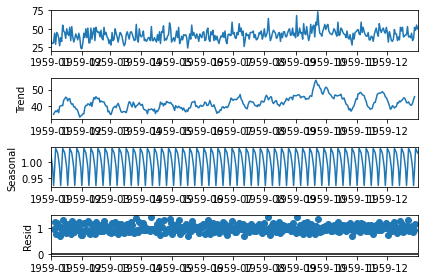

In [21]:
result.plot()
pyplot.show()


In [7]:
def set_time_series(df, col, formula="%Y-%m-%d"):
    df[col] = df[col].map(lambda x: datetime.strptime(x, formula))
    df.set_index(col, inplace=True)
    return df

In [8]:
def decompose_ts(df, model="additive"):
    result = seasonal_decompose(df, model=model)
    return result


In [9]:
df_decompose = pd.DataFrame([result.trend, result.seasonal, result.resid]).T
df_decompose.head(2)

,trend,seasonal,resid
Date,,,
1959-01-01,NaN,1.028509,NaN
1959-01-02,NaN,1.007079,NaN


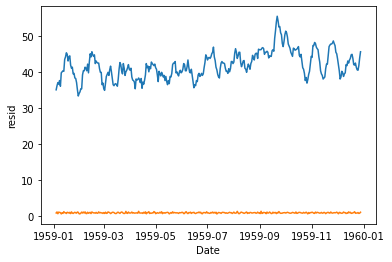

In [24]:
sns.lineplot(y=result.trend, x=df_decompose.index)
sns.lineplot(y=df_decompose.resid, x=df_decompose.index)


In [171]:
data = [go.Scatter(x=result.seasonal.index, y=result.trend)]

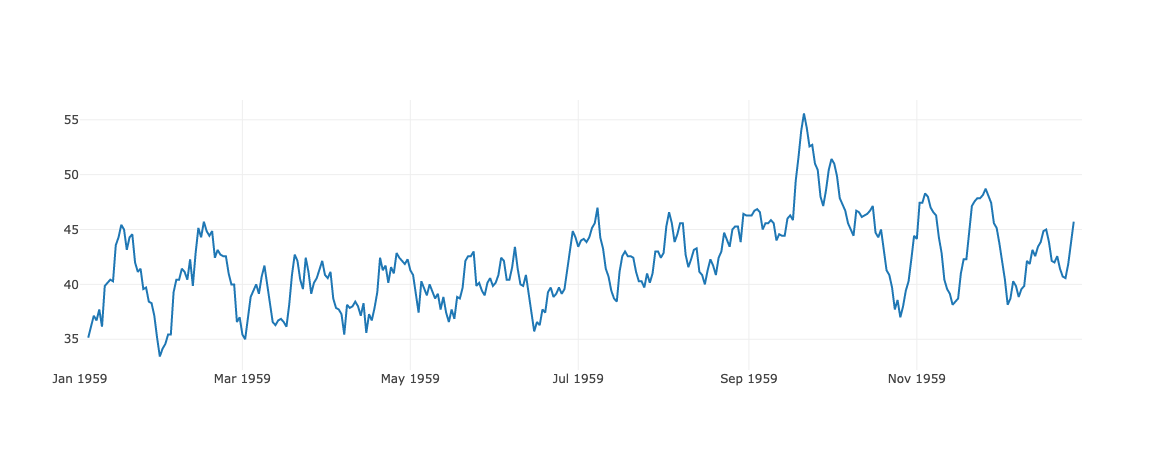

In [173]:
fig = go.Figure(data=data)
iplot(fig)

# differencing

In [ ]:
# How to difference

# Test for stationarity

In [42]:
from statsmodels.tsa.stattools import adfuller, kpss


In [37]:
def test_stationarity(df, test="dickey-fuller"):
    result = adfuller(df.index)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    dickey_output = pd.Series()
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [101]:
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return pd.DataFrame(dfoutput, columns=["stats"])

In [102]:
adf_test(df)

,stats
Test Statistic,-4.808291
p-value,0.000052
#Lags Used,6.000000
Number of Observations Used,358.000000
Critical Value (1%),-3.448749
Critical Value (5%),-2.869647
Critical Value (10%),-2.571089


In [103]:
def kpss_test(timeseries):
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    
    kpss_df = pd.DataFrame(o, columns=['stats'])
    return kpss_df

In [106]:
kpss_test(df)

/Users/richardtruong-chau/miniconda3/envs/datadescribe/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning:

p-value is smaller than the indicated p-value



,stats
Test Statistic,2.132587
p-value,0.010000
Lags Used,17.000000
Critical Value (10%),0.347000
Critical Value (5%),0.463000
Critical Value (2.5%),0.574000
Critical Value (1%),0.739000


# acf/pacf plot

In [190]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
#from statsmodels.api.graphics.tsa import plot_acf, plot_pacf

In [160]:
acf(df)

/Users/richardtruong-chau/miniconda3/envs/datadescribe/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

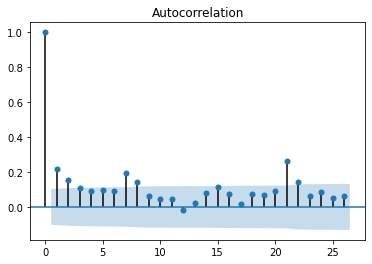

In [191]:
acf_graph = sm.graphics.tsa.plot_acf(df)
#plt.show()

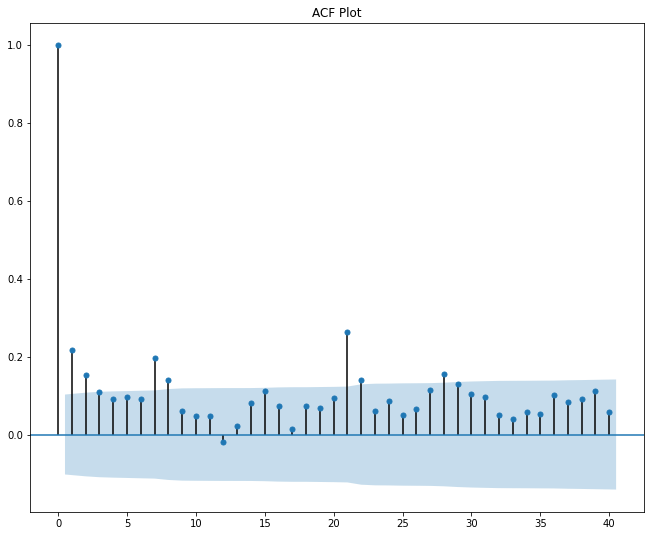

In [193]:
fig, ax = plt.subplots(figsize=(11, 9))
fig = api.graphics.tsa.plot_acf(df, lags = 40, title='ACF Plot', ax=ax)
#plt.show()

In [161]:
trace1 = [acf(df)]

In [179]:
data = [go.Bar(y=pacf(df))]

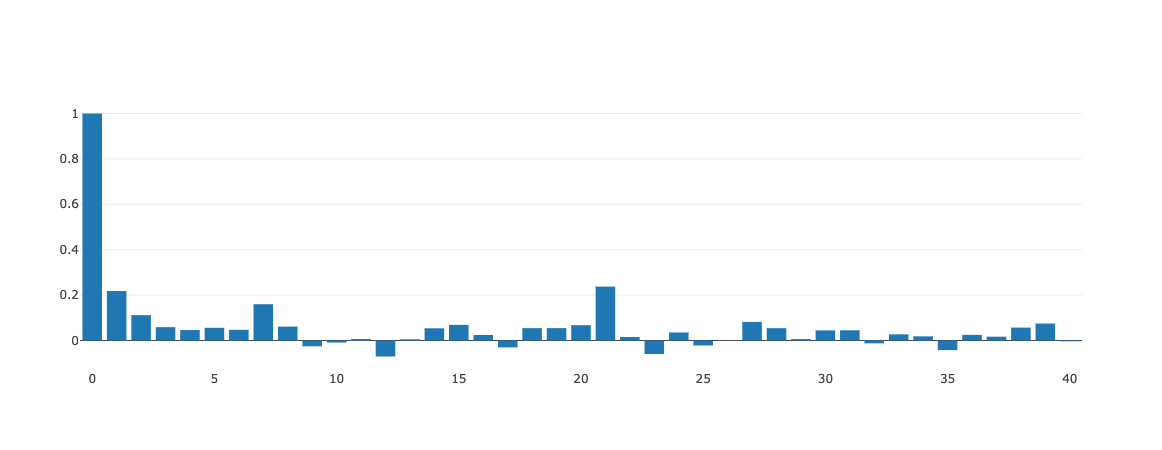

In [180]:
fig = go.Figure(data=data)
iplot(fig)

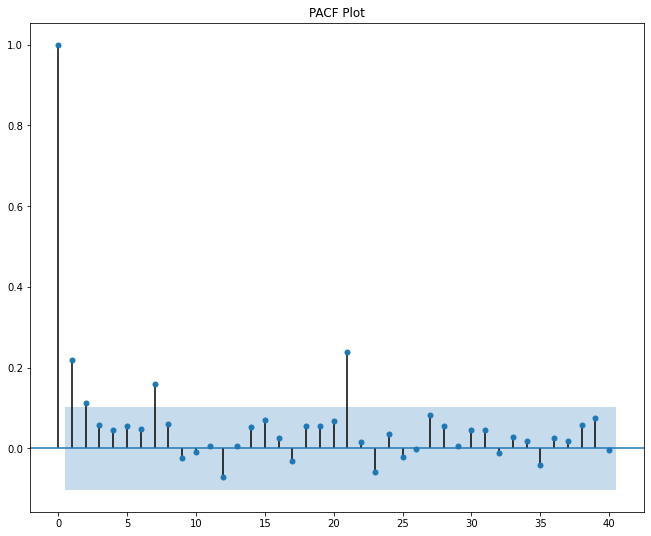

In [170]:
fig, ax = plt.subplots(figsize=(11, 9))
api.graphics.tsa.plot_pacf(df, lags = 40, title='PACF Plot', ax=ax)
plt.show()

# time dependent factors

In [301]:
df['ex'] = df['Births'].map(lambda x: x+10)

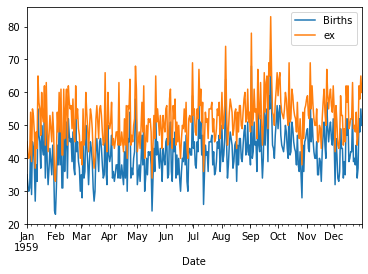

In [302]:
df.plot()

In [405]:
def plot_time_series(df, cols=None):
    fig, ax = plt.subplots(figsize=(11, 9))
    if isinstance(cols, list):
        for i in cols:
            fig = sns.lineplot(x=df.index, y=df[i], legend='full', ax=ax)
            plt.legend(cols)
    elif isinstance(cols, str):
        fig = sns.lineplot(x=df.index, y=df[cols], legend='full', ax=ax)
        plt.legend(cols)
    return fig
   

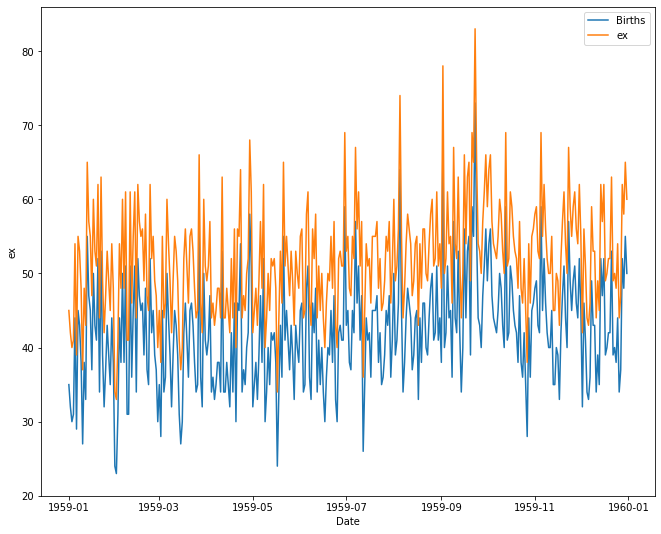

In [407]:
plot_time_series(df, cols=['Births', 'ex'])

In [ ]:
data = [go.Scatter(x=result.seasonal.index, y=result.trend)]

In [ ]:
fig = go.Figure(data=data)
iplot(fig)

In [408]:
def plotly_time_series(df, cols=None):
    data = []
    if isinstance(cols, list):
        for i in cols:
            data.append(go.Scatter(x=df.index, y=df[i]))
    elif isinstance(cols, str):
        data.append(go.Scatter(x=df.index, y=df[cols]))
    return go.Figure(data=data)


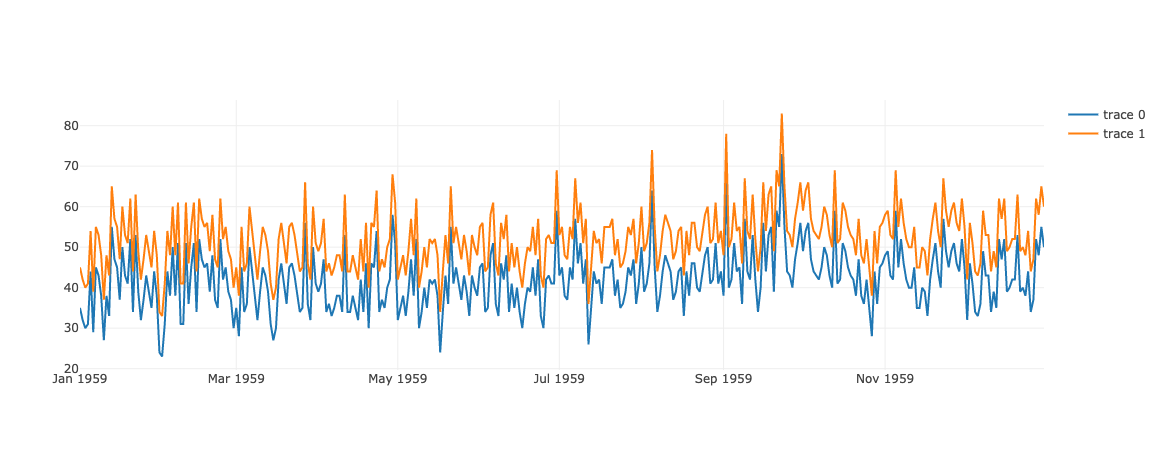

In [411]:
iplot(plotly_time_series(df, cols=['Births', 'ex']))